# Dataset Presentation of CB513

In [1]:
import numpy as np

# Load training data from cb513
training_data = np.load('cb513.npy')
print('sequences:',training_data.shape[0],
      '\nfeatures:' ,training_data.shape[1])

sequences: 514 
features: 39900


In [2]:
# Pick the first sample (sequence) and reshape it to 700 x 57 (sequence length x features+labels) 
first_sequence = training_data[0,:].reshape((700,57))
print(first_sequence.shape,'\n',first_sequence)

(700, 57) 
 [[0.         0.         0.         ... 0.26894142 0.9234378  0.        ]
 [0.         0.         0.         ... 0.11920292 0.00919371 0.        ]
 [0.         0.         0.         ... 0.5        0.02508696 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [3]:
# Pick a residue in the sequence
ex = first_sequence[19,:]
print(ex)

[0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.11608892
 0.09885607 0.01177421 0.01477403 0.19940776 0.00776757 0.01131776
 0.99635229 0.02253264 0.69423634 0.52248482 0.01212843 0.02043219
 0.02188127 0.01695654 0.03489141 0.17079548 0.97768656 0.0206333
 0.26894142 0.08166026 0.        ]


In [4]:
# Analyze features for this residue
one_hot = ex[:22]
print('Residue (one hot encoded):\n',one_hot,'\n  A  C  E  D  G  F  I  H  K  M  L  N  Q  P  S  R  T  W  V  Y  X  NoSeq\n')
seq_str = ex[22:31]
print('Structure (one hot encoded):\n',seq_str,'\n  L  B  E  G  I  H  S  T  NoSeq\n')
ter = ex[31:33]
print('Terminals:\n',ter,'\n  N- C-\n')
solv = ex[33:35]
print('Solvent Accessibility:\n',solv, '\n Absolute and Relative solvent accessibility\n')
seq_prf = ex[35:57]
print('Profiles:\n',seq_prf, '\n  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  X  Y\n')

Residue (one hot encoded):
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
  A  C  E  D  G  F  I  H  K  M  L  N  Q  P  S  R  T  W  V  Y  X  NoSeq

Structure (one hot encoded):
 [0. 0. 0. 0. 0. 1. 0. 0. 0.] 
  L  B  E  G  I  H  S  T  NoSeq

Terminals:
 [0. 0.] 
  N- C-

Solvent Accessibility:
 [0. 0.] 
 Absolute and Relative solvent accessibility

Profiles:
 [0.11608892 0.09885607 0.01177421 0.01477403 0.19940776 0.00776757
 0.01131776 0.99635229 0.02253264 0.69423634 0.52248482 0.01212843
 0.02043219 0.02188127 0.01695654 0.03489141 0.17079548 0.97768656
 0.0206333  0.26894142 0.08166026 0.        ] 
  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  X  Y



In [5]:
# Compute label counts
str_counter = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    str_counter +=  sumstructs
    

<BarContainer object of 9 artists>

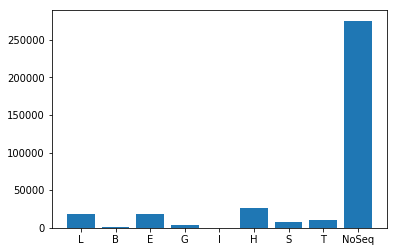

In [11]:
import matplotlib.pyplot as plt
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T','NoSeq'],str_counter)

<BarContainer object of 8 artists>

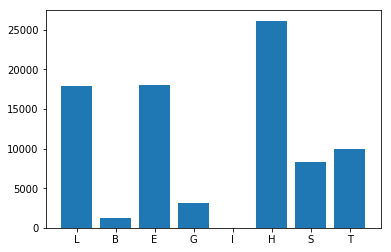

In [7]:
# plot once again without NoSeq
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'],str_counter[:-1])

In [8]:
# Compute solvent access
res_counter = np.array([0.]*22)
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    ress = sequence[:, :22]
    sumress = np.sum(ress, axis = 0)
    res_counter +=  sumress

<BarContainer object of 22 artists>

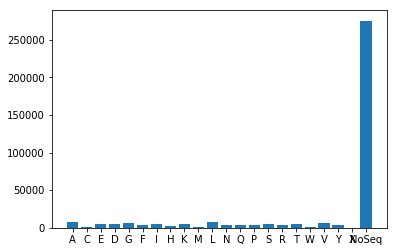

In [9]:
plt.bar(['A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X','NoSeq'],
        res_counter)

<BarContainer object of 21 artists>

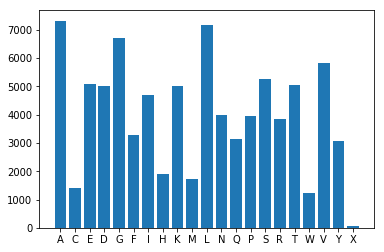

In [10]:
# plot once again without NoSeq
plt.bar(['A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X'],
        res_counter[:-1])

In [12]:
abs_solv = []
rel_solv = []
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    abs_solv += list(sequence[:, 33])
    rel_solv += list(sequence[:, 34])

<BarContainer object of 2 artists>

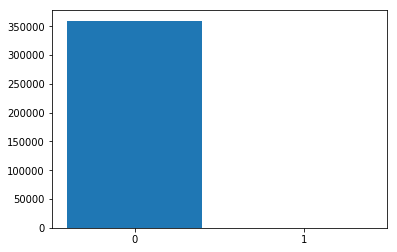

In [13]:
plt.bar(['0','1'],[abs_solv.count(0), abs_solv.count(1)])

<BarContainer object of 2 artists>

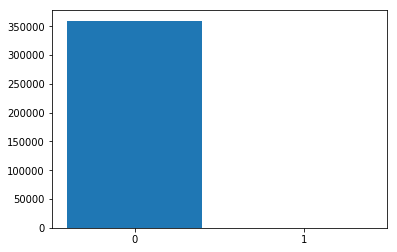

In [14]:
plt.bar(['0','1'],[rel_solv.count(0), rel_solv.count(1)])